In [17]:
"""
Read wrk folder for *.summary.xlsx
  extract warming and cooling data for all variables
  save and plot
  
  Mingsong Li
  
  Oct 12, 2020
  
  Update: Feb 26, 2021
      Show only SST in the pre-PETM
      And dSST using all datasets
    Update: Feb 27, 2021
        fig. 1: proxy sensitivity test: all + noT + noO + noMg + noCa + T + O + Mg + Ca
        fig. 2: PSM sensitivity test:  deepmip vs bays:  All + TOM + T + O + Mg
"""
import os
import pandas
import matplotlib.pyplot as plt
from sys import platform as sys_pf
if sys_pf == 'darwin':
    import matplotlib
    matplotlib.use("TkAgg")
    import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt
import numpy as np


## User defined start
if sys_pf == 'darwin':
    xlsxdir = '/Users/mingsongli/Dropbox/git/deepDA/mlwrk/wrk/'
else:
    xlsxdir = '/mnt/c/Users/mul450/Dropbox/git/deepDA/mlwrk/wrk/'
exportxlsx = 1
plotdata = 1

# d18O, Mg/ca, TEX, SIGMA, CaCO3, All

# see below, unused
dict0 ={
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_TOM_deepmip_MCsd100-petmproxy3slices_v0.0.18.csv_petm18_v18_2021117_TOM_deepmip_MCsd100.summary.xlsx':'\u03A3\u2081tomdp',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_TOM_deepmip_texh_MCsd100.summary.xlsx':'\u03A3\u2082_tom17dp',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_all_deepmip_MCsd100-petmproxy3slices_v0.0.18.csv_petm18_v18_2021102_all_deepmip_MCsd100.summary.xlsx':'\u03A3\u2083alldp',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_all_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_all_e400_MC100seed.summary.xlsx':'\u03A3\u2084all',
    'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2021012_TOM_MC100seed-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021012_TOM_MC100seed.summary.xlsx':'\u03A3\u2085tomh2',
    'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_all_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_all_100mc.summary.xlsx':'\u03A3\u2086allh2',
    'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc.summary.xlsx':'\u03A3',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_O_deepmip_MCsd100.summary.xlsx':'\u03B4\u00B9\u2078Od',
    'petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_o_100mc.summary.xlsx':'\u03B4\u00B9\u2078Ob',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_M_deepmip_MCsd100.summary.xlsx':'Mg/Cad',
    'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_mg_100mc.summary.xlsx':'Mg/Cab',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_T_texh_MCsd100.summary.xlsx':u'TEX\u2088\u2086h',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021102_T_deepmip_MCsd100.summary.xlsx': u'TEX\u2088\u2086b',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e100_100mc.summary.xlsx': 'All',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e400_100mc.summary.xlsx':'All',
    #'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e100_100mc.summary.xlsx':'CaCO\u2083',
    #'petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx':'CaCO\u2083',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021012_ca_e100_MC100seed-petmproxy3slices_v0.0.18.csv_petm18_v18_2021012_ca_e400_MC100seed.summary.xlsx':'CaCO\u2083',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021212_Ca_e100_MCsd100_qc3-petmproxy3slices_v0.0.18.csv_petm18_v18_2021212_Ca_e400_MCsd100_qc3.summary.xlsx': 'CaCO\u2083qce4',
    'petmproxy3slices_v0.0.18.csv_petm17_v18_2021212_Ca_e100_MCsd100_qc3-petmproxy3slices_v0.0.18.csv_petm18_v18_2021212_Ca_e100_MCsd100_qc3.summary.xlsx':'CaCO\u2083qce1',
    'petmproxy3slices_v0.0.18hiatus.csv_petm17_v18h_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus.csv_petm18_v18h_2021011_ca_e400_100mc.summary.xlsx':'CaCO\u2083',
    'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2021011_ca_e400_100mc.summary.xlsx':'CaCO\u2083h2',
    'petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx':'h2TOMdf',
    }

# compare proxy
whitelist17 =[
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_deepmip_peakPETM_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_2021117_TOM_deepmip_MCsd100.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_OM_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_OM_Ca100_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TM_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TM_Ca100_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TO_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TO_Ca100_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_T_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_T_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_O_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_O_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_M_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_M_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_Ca100_deepmip_MCsd100_R1.summary.xlsx',
    ]

# compare PSM
whitelist17 =[
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_deepmip_peakPETM_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_bays_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_bays_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_2021117_TOM_deepmip_MCsd100.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_bays_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TOM_bays_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_T_texh_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_T_texh_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_T_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_T_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_O_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_O_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_O_bays_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_O_bays_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_M_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_M_deepmip_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_M_bays_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_M_bays_MCsd100_R1.summary.xlsx',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_Ca100_deepmip_MCsd100_R1.summary.xlsx',
    ]

whitelist17 =['petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_deepmip_peakPETM_MCsd100_R1.summary.xlsx',
             'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1.summary.xlsx']

dict0 ={
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_deepmip_peakPETM_MCsd100_R1.summary.xlsx':'dAll',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_bays_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_bays_MCsd100_R1.summary.xlsx':'bAll',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_2021117_TOM_deepmip_MCsd100.summary.xlsx':'dNoCa',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_bays_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TOM_bays_MCsd100_R1.summary.xlsx':'bNoCa',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_OM_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_OM_Ca100_deepmip_MCsd100_R1.summary.xlsx':'NoTEX',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TM_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TM_Ca100_deepmip_MCsd100_R1.summary.xlsx':'NoO',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TO_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TO_Ca100_deepmip_MCsd100_R1.summary.xlsx':'NoMg',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_T_texh_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_T_texh_MCsd100_R1.summary.xlsx':'hTEX',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_T_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_T_deepmip_MCsd100_R1.summary.xlsx':'bTEX',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_O_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_O_deepmip_MCsd100_R1.summary.xlsx':'dO',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_O_bays_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_O_bays_MCsd100_R1.summary.xlsx':'bO',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_M_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_M_deepmip_MCsd100_R1.summary.xlsx':'dMg',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_M_bays_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_M_bays_MCsd100_R1.summary.xlsx':'bMg',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_Ca100_deepmip_MCsd100_R1.summary.xlsx':'Ca',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca25_deepmip_MCsd100_R1.summary.xlsx':'All25',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1.summary.xlsx':'All27'
}

# same content but different order
dict0 ={
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_deepmip_peakPETM_MCsd100_R1.summary.xlsx':'dAll',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_2021117_TOM_deepmip_MCsd100.summary.xlsx':'dNoCa',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_T_texh_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_T_texh_MCsd100_R1.summary.xlsx':'hTEX',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_O_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_O_deepmip_MCsd100_R1.summary.xlsx':'dO',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_M_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_M_deepmip_MCsd100_R1.summary.xlsx':'dMg',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_bays_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_bays_MCsd100_R1.summary.xlsx':'bAll',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_bays_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TOM_bays_MCsd100_R1.summary.xlsx':'bNoCa',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_OM_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_OM_Ca100_deepmip_MCsd100_R1.summary.xlsx':'NoTEX',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TM_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TM_Ca100_deepmip_MCsd100_R1.summary.xlsx':'NoO',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TO_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210227_TO_Ca100_deepmip_MCsd100_R1.summary.xlsx':'NoMg',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_T_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_T_deepmip_MCsd100_R1.summary.xlsx':'bTEX',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_O_bays_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_O_bays_MCsd100_R1.summary.xlsx':'bO',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_M_bays_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_M_bays_MCsd100_R1.summary.xlsx':'bMg',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_Ca100_deepmip_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_Ca100_deepmip_MCsd100_R1.summary.xlsx':'Ca',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca25_deepmip_MCsd100_R1.summary.xlsx':'All25',
    'petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1.summary.xlsx':'All27'
}


#catag0 = 'pre-PETM'
catag0 = 'Peak_warming'

## User defined end
pwd = os.getcwd()
df = pandas.DataFrame()

for file in os.listdir(xlsxdir):
    #if file.endswith(".summary.xlsx"):
    if file in whitelist17:
        filefull = os.path.join(xlsxdir, file)        
        excel = pandas.read_excel(filefull, index_col=0)
        # read catag0 data only
        if excel['label'].str.contains(catag0).any():
            df0 = pandas.DataFrame({'file':[file]},index = range(1))
            df1 = pandas.concat([df0]*7, ignore_index=True)
            df2 = excel[excel['label'].str.contains(catag0, na=False)]
            df3 = pandas.concat([df1,df2],axis=1)
            df = pandas.concat([df,df3])

#print(df)
df = df.sort_index()
print('')
#print(df)

# sort by dict0
df.file = df.file.astype("category")
#print(df)
df.file.cat.set_categories(list(dict0.keys()), inplace=True)
#print(df)
df = df.sort_values(["file"])
#print(df)
print('Okay')


Okay


                                                file field      mean  \
0  petmproxy3slices_v0.0.18.csv_petm27_v18_202102...   NaN  5.780420   
1  petmproxy3slices_v0.0.18.csv_petm27_v18_202102...   NaN  3.905472   

        std      2.5%        5%      25%    median       75%       95%  \
0  0.897608  4.144850  4.373782  5.14974  5.756759  6.392514  7.281144   
1  0.713728  2.411536  2.586392  3.38547  3.967985  4.403915  5.051094   

      97.5%         label  
0  7.582903  Peak_warming  
1  5.184069  Peak_warming  

0
read 0, petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm18_v18_20210224_TOM_Ca100_deepmip_peakPETM_MCsd100_R1.summary.xlsx
1
read 1, petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1-petmproxy3slices_v0.0.18.csv_petm27_v18_20210224_TOM_Ca100_deepmip_3slice_MCsd100_R1.summary.xlsx
[{'label': 'dAll', 'mean': 5.78042013836997, 'q1': 4.373781950829438, 'q3': 7.281143830

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

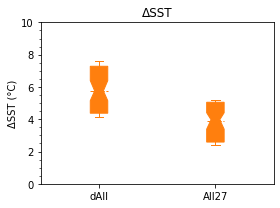

In [20]:
# Test proxy sensitivity

#print(df)

# prePETM DA plot and data saving
#warmcool = 'warming'
whiteblack = 'white'   # using white list
priorset = 17    # prior using PETM017 or PETM018
# 0 = SST; 1=SAT; 2=pCO2; 3=SAL; 4=pH; 5=Omega; 6=CaCO3
locexclude = [1,2,3,4,5,6]
#locexclude = [1,3,5]

nrowi = 7-len(locexclude)  # number of rows for plot

if catag0 == 'pre-PETM':
    colori = 'C2'
    figsizei = (3,10)    
    ylimi = (20,40)
elif catag0 == 'Peak_warming':
    colori = 'C1'
    figsizei = (3,10)    
    ylimi = (2,16)
    
    figsizei = (4,3)    
    ylimi = (0,10)
    
if nrowi == 1:
    figsizei = (10,6)
    figsizei = (4,3)    
    
elif nrowi == 2: # SST & CaCO3
    figsizei = (14,10)
    
elif nrowi == 4: # SST & CaCO3
    figsizei = (14,18)
    
if priorset == 17:
    whitelist = whitelist17
else:
    whitelist = whitelist18
    
warmfig = xlsxdir+whiteblack+'.sum.'+str(priorset)+'.'+catag0+'deepmip_all.vsSamePrior.pdf'
fullname = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+catag0+'deepmip_all.vsSamePrior.xlsx'
fullused = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+catag0+'deepmip_all.used.vsSamePrior.xlsx'

dfused = pandas.DataFrame()  # save used data

if plotdata == 1:
    fig, axes = plt.subplots(nrows=nrowi, ncols=1,figsize=figsizei)
    locip = 0
    for loci in range(7):
        if loci in locexclude:
            continue
        #if catag == catag0:
        result = df.loc[loci]
        a_list = []
        result.index = np.arange(0,len(result)).tolist()
        
        print(result)
        print('')
        for ki in range(len(result)):
            print(ki)
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    print('Skip {}'.format(filei))
                    continue
            print('read {}, {}'.format(ki,filei))
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
            
            df4 = result.iloc[ki]
            df4['proxy'] = dict0[filei]
            if loci == 0:
                df4['field'] = 'dSST'                
            elif loci == 1:
                df4['field'] = 'dSAT'
            elif loci == 2:
                df4['field'] = 'dCO2'
            elif loci == 4:
                df4['field'] = 'dpH'
            elif loci == 6:
                df4['field'] = 'dCaCO3'
            dfused = pandas.concat([dfused,df4],sort=False,axis=1)
        print(a_list)
        
        if loci == 0:
            titleip = '\u0394SST'
            ylableip = '\u0394SST (\u00B0C)'
            ylimip = ylimi
        elif loci == 1:
            titleip = '\u0394SAT'
            ylableip = '\u0394SAT (\u00B0C)'
            ylimip = ylimi
        elif loci == 2:
            titleip = '\u0394$\it{p}$CO$_2$'
            ylableip = '\u0394$\it{p}$CO$_2$ (ppm)'
            ylimip = ylimj
        elif loci == 4:
            titleip = '\u0394pH'
            ylableip = '\u0394pH'
            ylimip = ylimk
        elif loci == 6:
            titleip = '\u0394CaCO\u2083'
            ylableip = '\u0394CaCO\u2083 (%)'
            ylimip = yliml

        if nrowi == 1:
            axes.set_title(titleip)
            axes.set_ylabel(ylableip)
            axes.set_ylim(ylimip)
            bp = axes.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes.yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
            #if warmcool == 'cooling' and loci == 0:
            #    axes.set_ylim(axes[0].get_ylim()[::-1])
                
        elif nrowi > 1:
            axes[locip].set_title(titleip)
            axes[locip].set_ylabel(ylableip)
            axes[locip].set_ylim(ylimip)
            bp = axes[locip].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[locip].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
            #if warmcool == 'cooling' and loci == 0:
            #    axes[locip].set_ylim(axes[locip].get_ylim()[::-1])
                
        fig.tight_layout()
        locip = locip + 1
    fig.savefig(warmfig)
    
if exportxlsx == 1:
    dfused=dfused.transpose()
    #dfused = dfused.sort_index()
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)
    dfused.to_excel(fullused)

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

[{'label': 'dAll', 'mean': 5.78042013836997, 'q1': 4.373781950829438, 'q3': 7.281143830823638, 'cilo': 5.149739608316789, 'med': 5.756759354422762, 'cihi': 6.392513941401276, 'iqr': 1.242774333084487, 'whislo': 4.144850199275253, 'whishi': 7.582903301337149, 'fliers': [nan]}, {'label': 'dNoCa', 'mean': 5.802764441589177, 'q1': 4.606824958047818, 'q3': 6.959203659236761, 'cilo': 5.390643325365711, 'med': 5.776571659225125, 'cihi': 6.270928220129801, 'iqr': 0.88028489476409, 'whislo': 4.38508268422843, 'whishi': 7.218042435432008, 'fliers': [nan]}, {'label': 'hTEX', 'mean': 6.135714174448851, 'q1': 3.784340961229733, 'q3': 8.881611965769562, 'cilo': 5.050983830183252, 'med': 6.028431089675227, 'cihi': 7.120268957917864, 'iqr': 2.069285127734612, 'whislo': 3.367739684976925, 'whishi': 9.372800251686769, 'fliers': [nan]}, {'label': 'dO', 'mean': 5.296680662191874, 'q1': 3.642611785330167, 'q3': 7.216361342543393, 'cilo': 4.52985152085183, 'med': 5.219340863017086, 'cihi': 5.991351018755478

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

[{'label': 'dAll', 'mean': 1068.687072982788, 'q1': 734.7821594238281, 'q3': 1419.305056762695, 'cilo': 921.50830078125, 'med': 1062.779144287109, 'cihi': 1213.54280090332, 'iqr': 292.0345001220701, 'whislo': 680.6222473144531, 'whishi': 1479.162670898437, 'fliers': [nan]}, {'label': 'dNoCa', 'mean': 802.7374281906128, 'q1': 631.2060668945312, 'q3': 989.1743041992186, 'cilo': 737.3953552246094, 'med': 794.4067993164062, 'cihi': 864.5753173828125, 'iqr': 127.17996215820312, 'whislo': 577.4105209350586, 'whishi': 1046.42940826416, 'fliers': [nan]}, {'label': 'hTEX', 'mean': 803.550640411377, 'q1': 359.8188720703125, 'q3': 1257.68853149414, 'cilo': 600.44970703125, 'med': 795.6510620117188, 'cihi': 1008.960693359375, 'iqr': 408.510986328125, 'whislo': 295.6011383056641, 'whishi': 1324.74306640625, 'fliers': [nan]}, {'label': 'dO', 'mean': 805.9753212661743, 'q1': 438.2130187988282, 'q3': 1172.034851074219, 'cilo': 645.7809753417969, 'med': 800.4449005126953, 'cihi': 972.58447265625, 'iqr'

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

[{'label': 'dAll', 'mean': -0.4206655394963007, 'q1': -0.6536800101317098, 'q3': -0.2644199665870451, 'cilo': -0.4956281042889334, 'med': -0.3978397019001658, 'cihi': -0.3330039323364173, 'iqr': 0.1626241719525161, 'whislo': -0.6865486508443207, 'whishi': -0.2427685242331489, 'fliers': [nan]}, {'label': 'dNoCa', 'mean': -0.2203793602656791, 'q1': -0.3396670526430749, 'q3': -0.1016368424694844, 'cilo': -0.2644160661908148, 'med': -0.2218070562373207, 'cihi': -0.1722001507795976, 'iqr': 0.09221591541121721, 'whislo': -0.3541702486138321, 'whishi': -0.09270116774416733, 'fliers': [nan]}, {'label': 'hTEX', 'mean': -0.2560912321069623, 'q1': -0.4153719833279184, 'q3': -0.04584927385024592, 'cilo': -0.3294024023561848, 'med': -0.2716071597778993, 'cihi': -0.1939757626359633, 'iqr': 0.13542663972022148, 'whislo': -0.4472392423640302, 'whishi': -0.01383170072545004, 'fliers': [nan]}, {'label': 'dO', 'mean': -0.225909829419331, 'q1': -0.3587434935964925, 'q3': -0.03449612767656858, 'cilo': -0.2

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

[{'label': 'dAll', 'mean': -26.1940649806888, 'q1': -36.60564931438056, 'q3': -15.42758880821104, 'cilo': -31.60780482301926, 'med': -26.08013268877599, 'cihi': -21.23745816434462, 'iqr': 10.370346658674642, 'whislo': -37.83227335896814, 'whishi': -13.63686830939016, 'fliers': [nan]}, {'label': 'dNoCa', 'mean': -7.417537055348381, 'q1': -20.58846380992808, 'q3': 4.975432166129984, 'cilo': -12.78128186599165, 'med': -6.663623938867023, 'cihi': -2.135106374417033, 'iqr': 10.646175491574617, 'whislo': -22.84925398984488, 'whishi': 7.051973638651194, 'fliers': [nan]}, {'label': 'hTEX', 'mean': -19.68251376195429, 'q1': -37.87688771836066, 'q3': 4.928317816508538, 'cilo': -30.06075429552281, 'med': -22.05590897192114, 'cihi': -10.71647797067676, 'iqr': 19.34427632484605, 'whislo': -39.943395325354, 'whishi': 9.242686062669996, 'fliers': [nan]}, {'label': 'dO', 'mean': -8.308883172683355, 'q1': -25.81785682076333, 'q3': 17.89381470272945, 'cilo': -19.79301898040213, 'med': -11.99557069282234

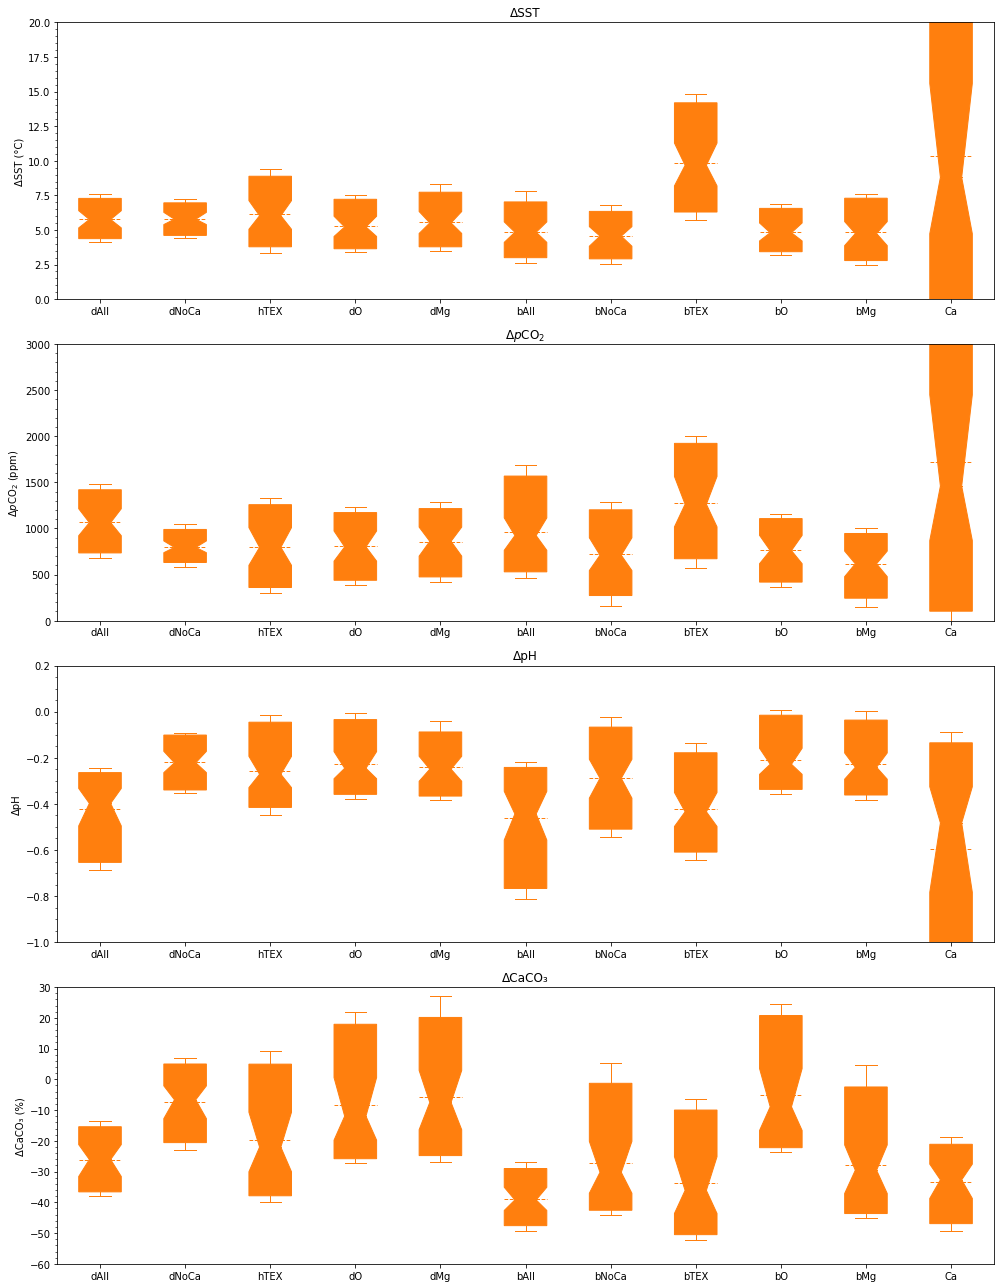

In [10]:
# figure 3 in the main paper

# warming / cooling plot and data saving

warmcool = 'warming'
#warmcool = 'cooling'
#whiteblack = 'black'  # using black list
whiteblack = 'white'   # using white list
priorset = 17    # prior using PETM017 or PETM018
# 0 = SST; 1=SAT; 2=pCO2; 3=SAL; 4=pH; 5=Omega; 6=CaCO3
#locexclude = [1,2,3,4,5]
locexclude = [1,3,5]

nrowi = 7-len(locexclude)  # number of rows for plot

if warmcool == 'cooling':
    colori = 'C2'
    figsizei = (3,10)    
    ylimi = (-12,-1)
    ylimj = (-1800,-200)
    ylimk = (0,0.4)
    
elif warmcool == 'warming':
    colori = 'C1'
    figsizei = (3,10)
    ylimi = (0,20)  #0 & 1
    ylimj = (0,3000) #2
    ylimk = (-1,0.2) #4
    yliml = (-60,30) #6
    
if nrowi == 1:
    figsizei = (10,6)
    
elif nrowi == 2: # SST & CaCO3
    figsizei = (14,10)
    
elif nrowi == 4: # SST & CaCO3
    figsizei = (14,18)
    
if priorset == 17:
    whitelist = whitelist17
else:
    whitelist = whitelist18
    
warmfig = xlsxdir+whiteblack+'.sum.'+str(priorset)+'.'+warmcool+'deepmip_all.pdf'
fullname = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+warmcool+'deepmip_all.xlsx'
fullused = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+warmcool+'deepmip_all.used.xlsx'

dfused = pandas.DataFrame()  # save used data

if plotdata == 1:
    fig, axes = plt.subplots(nrows=nrowi, ncols=1,figsize=figsizei)
    locip = 0
    for loci in range(7):
        if loci in locexclude:
            continue
        if warmcool == 'cooling':
            result = dfcool.loc[loci]
        elif warmcool == 'warming':
            result = df.loc[loci]
        a_list = []
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
            
            df4 = result.iloc[ki]
            df4['proxy'] = dict0[filei]
            if loci == 0:
                df4['field'] = 'dSST'                
            elif loci == 1:
                df4['field'] = 'dSAT'
            elif loci == 2:
                df4['field'] = 'dCO2'
            elif loci == 4:
                df4['field'] = 'dpH'
            elif loci == 6:
                df4['field'] = 'dCaCO3'
            dfused = pandas.concat([dfused,df4],sort=False,axis=1)
        print(a_list)
        
        if loci == 0:
            titleip = '\u0394SST'
            ylableip = '\u0394SST (\u00B0C)'
            ylimip = ylimi
        elif loci == 1:
            titleip = '\u0394SAT'
            ylableip = '\u0394SAT (\u00B0C)'
            ylimip = ylimi
        elif loci == 2:
            titleip = '\u0394$\it{p}$CO$_2$'
            ylableip = '\u0394$\it{p}$CO$_2$ (ppm)'
            ylimip = ylimj
        elif loci == 4:
            titleip = '\u0394pH'
            ylableip = '\u0394pH'
            ylimip = ylimk
        elif loci == 6:
            titleip = '\u0394CaCO\u2083'
            ylableip = '\u0394CaCO\u2083 (%)'
            ylimip = yliml

        if nrowi == 1:
            axes.set_title(titleip)
            axes.set_ylabel(ylableip)
            axes.set_ylim(ylimip)
            bp = axes.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes.yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
            if warmcool == 'cooling' and loci == 0:
                axes.set_ylim(axes[0].get_ylim()[::-1])
                
        elif nrowi > 1:
            axes[locip].set_title(titleip)
            axes[locip].set_ylabel(ylableip)
            axes[locip].set_ylim(ylimip)
            bp = axes[locip].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[locip].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
            if warmcool == 'cooling' and loci == 0:
                axes[locip].set_ylim(axes[locip].get_ylim()[::-1])
                
        fig.tight_layout()
        locip = locip + 1
    fig.savefig(warmfig)
    
if exportxlsx == 1:
    dfused=dfused.transpose()
    #dfused = dfused.sort_index()
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)
    dfused.to_excel(fullused)

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

[{'label': 'Σ₁', 'mean': 6.018738085746765, 'q1': 4.751416397094727, 'q3': 7.262330150604247, 'cilo': 5.498147964477539, 'med': 6.037482261657715, 'cihi': 6.530256748199463, 'iqr': 1.0321087837219238, 'whislo': 4.54521164894104, 'whishi': 7.512366819381713, 'fliers': [nan]}, {'label': 'Σ₂', 'mean': 5.817472884559631, 'q1': 5.03679780960083, 'q3': 6.598403930664062, 'cilo': 5.501985549926758, 'med': 5.800409317016602, 'cihi': 6.168215274810791, 'iqr': 0.6662297248840332, 'whislo': 4.908918952941895, 'whishi': 6.799077558517456, 'fliers': [nan]}, {'label': 'Σ₃', 'mean': 4.942939607429504, 'q1': 3.327818965911865, 'q3': 7.175002384185789, 'cilo': 4.244449138641357, 'med': 4.842774391174316, 'cihi': 5.414524555206299, 'iqr': 1.1700754165649414, 'whislo': 2.90691089630127, 'whishi': 7.894717931747435, 'fliers': [nan]}, {'label': 'Σ₄a', 'mean': 4.753628849792481, 'q1': 2.823891925811767, 'q3': 6.716614532470702, 'cilo': 3.930498123168945, 'med': 4.692349433898926, 'cihi': 5.598230838775635, 

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

[{'label': 'Σ₁', 'mean': 7.044652703285217, 'q1': -11.36459846496582, 'q3': 30.90487442016601, 'cilo': -1.971121788024902, 'med': 5.752765655517578, 'cihi': 14.83398151397705, 'iqr': 16.805103302001953, 'whislo': -14.28968276977539, 'whishi': 35.43892955780029, 'fliers': [nan]}, {'label': 'Σ₂', 'mean': 17.5723040599823, 'q1': 15.11116580963135, 'q3': 20.60895442962646, 'cilo': 16.350266456604, 'med': 17.40144729614258, 'cihi': 18.65309906005859, 'iqr': 2.30283260345459, 'whislo': 14.80851631164551, 'whishi': 21.23149747848511, 'fliers': [nan]}, {'label': 'Σ₃', 'mean': -24.49372428436279, 'q1': -40.03199768066406, 'q3': 1.362335968017557, 'cilo': -34.46234083175659, 'med': -27.59424877166748, 'cihi': -16.86895847320557, 'iqr': 17.593382358551022, 'whislo': -41.31312375068664, 'whishi': 7.54370527267456, 'fliers': [nan]}, {'label': 'Σ₄a', 'mean': -33.39347612552643, 'q1': -43.11114645004272, 'q3': -21.95669088363648, 'cilo': -37.86036920547485, 'med': -33.7837610244751, 'cihi': -29.72667

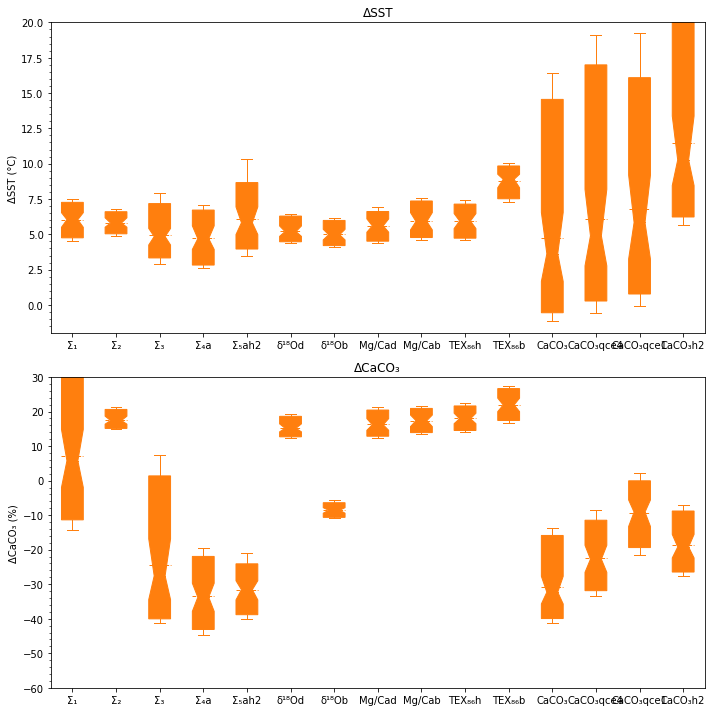

In [57]:
# figure 3 in the main paper

# warming / cooling plot and data saving

warmcool = 'warming'
#warmcool = 'cooling'
#whiteblack = 'black'  # using black list
whiteblack = 'white'   # using white list
priorset = 17    # prior using PETM017 or PETM018
nrowi = 2  # number of rows for plot

if warmcool == 'cooling':
    colori = 'C2'
    figsizei = (3,10)    
    ylimi = (-12,-1)
    ylimj = (-1800,-200)
    ylimk = (0,0.4)
    
elif warmcool == 'warming':
    colori = 'C1'
    figsizei = (3,10)
    ylimi = (1,12)
    ylimj = (200,1800)
    ylimk = (-0.4,0)
    
if nrowi == 1:
    figsizei = (10,6)
    ylimi = (-2,20)
    ylimi = (-60,30)
    
elif nrowi == 2: # SST & CaCO3
    figsizei = (10,10)
    ylimi = (-2,20)
    yliml = (-60,30)
    
if priorset == 17:
    whitelist = whitelist17
else:
    whitelist = whitelist18
    
warmfig = xlsxdir+whiteblack+'.sum.'+str(priorset)+'.'+warmcool+'deepmip_all.pdf'
fullname = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+warmcool+'deepmip_all.xlsx'
fullused = xlsxdir+whiteblack+'sum.'+str(priorset)+'.'+warmcool+'deepmip_all.used.xlsx'

dfused = pandas.DataFrame()  # save used data

if plotdata == 1:
    #fig, axes = plt.subplots(nrows=4, ncols=1,figsize=figsizei)
    fig, axes = plt.subplots(nrows=nrowi, ncols=1,figsize=figsizei)
    for loci in range(7):
        #if loci in [3,5,6]:
        #if loci in [1,2,3,4,5,6]:
        if loci in [1,2,3,4,5]:
            continue
        if warmcool == 'cooling':
            result = dfcool.loc[loci]
        elif warmcool == 'warming':
            result = df.loc[loci]
        a_list = []
        #result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
            
            df4 = result.iloc[ki]
            df4['proxy'] = dict0[filei]
            if loci == 0:
                df4['field'] = 'dSST'                
            elif loci == 1:
                df4['field'] = 'dSAT'
            elif loci == 2:
                df4['field'] = 'dCO2'
            elif loci == 4:
                df4['field'] = 'dpH'
            elif loci == 6:
                df4['field'] = 'dCaCO3'
            dfused = pandas.concat([dfused,df4],sort=False,axis=1)
            #dfused = pandas.concat([dfused,result],sort=False,axis=1)
        print(a_list)
        
        if nrowi == 1:
            axes.set_title('\u0394SST')
            axes.set_ylabel('\u0394SST (\u00B0C)')
            axes.set_ylim(ylimi)
            bp = axes.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes.yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color=colori)
            if warmcool == 'cooling' and loci == 0:
                #plt.gca().invert_yaxis()
                axes.set_ylim(axes[0].get_ylim()[::-1])
                
        elif nrowi == 2:
            if loci == 0:
                axes[0].set_title('\u0394SST')
                axes[0].set_ylabel('\u0394SST (\u00B0C)')
                axes[0].set_ylim(ylimi)
                bp = axes[0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
                axes[0].yaxis.set_minor_locator(AutoMinorLocator())
                for element in bp.keys():
                    plt.setp(bp[element], color=colori)
                if warmcool == 'cooling' and loci == 0:
                    #plt.gca().invert_yaxis()
                    axes[0].set_ylim(axes[0].get_ylim()[::-1])
            elif loci == 6:
                axes[1].set_title('\u0394CaCO\u2083')
                axes[1].set_ylabel('\u0394CaCO\u2083 (%)')
                axes[1].set_ylim(yliml)
                bp = axes[1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
                axes[1].yaxis.set_minor_locator(AutoMinorLocator())
                for element in bp.keys():
                    plt.setp(bp[element], color='C1')
                if warmcool == 'cooling':
                    axes[1].set_ylim(axes[1].get_ylim()[::-1])
        else:
            if loci == 0:
                axes[0].set_title('\u0394SST')
                axes[0].set_ylabel('\u0394SST (\u00B0C)')
                axes[0].set_ylim(ylimi)
                bp = axes[0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
                axes[0].yaxis.set_minor_locator(AutoMinorLocator())
                for element in bp.keys():
                    plt.setp(bp[element], color=colori)
                if warmcool == 'cooling' and loci == 0:
                    #plt.gca().invert_yaxis()
                    axes[0].set_ylim(axes[0].get_ylim()[::-1])
            elif loci == 1:
                axes[1].set_title('\u0394SAT')
                axes[1].set_ylabel('\u0394SAT (\u00B0C)')
                axes[1].set_ylim(ylimi)
                bp = axes[1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
                axes[1].yaxis.set_minor_locator(AutoMinorLocator())
                for element in bp.keys():
                    plt.setp(bp[element], color=colori)
                if warmcool == 'cooling':
                    axes[1].set_ylim(axes[1].get_ylim()[::-1])
            elif loci == 2:
                axes[2].set_title('\u0394$\it{p}$CO$_2$')
                axes[2].set_ylabel('\u0394$\it{p}$CO$_2$ (ppm)')
                axes[2].set_ylim(ylimj)
                bp = axes[2].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
                axes[2].yaxis.set_minor_locator(AutoMinorLocator())
                for element in bp.keys():
                    plt.setp(bp[element], color=colori)
                if warmcool == 'cooling':
                    axes[2].set_ylim(axes[2].get_ylim()[::-1])
            elif loci == 4:
                axes[3].set_title('\u0394pH')
                axes[3].set_ylabel('\u0394pH')
                axes[3].set_ylim(ylimk)
                bp = axes[3].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
                axes[3].yaxis.set_minor_locator(AutoMinorLocator())
                for element in bp.keys():
                    plt.setp(bp[element], color=colori)
                if warmcool == 'cooling':
                    axes[3].set_ylim(axes[3].get_ylim()[::-1])
            #fig.subplots_adjust(hspace=0.2)
        fig.tight_layout()
    fig.savefig(warmfig)
    
if exportxlsx == 1:
    dfused=dfused.transpose()
    #dfused = dfused.sort_index()
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)
    dfused.to_excel(fullused)

/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/mingsongli/miniconda3/envs/deepda/lib/python3.6/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

saved @
/Users/mingsongli/Dropbox/git/deepDA/mlwrk/wrk/sum.17.cooling.xlsx


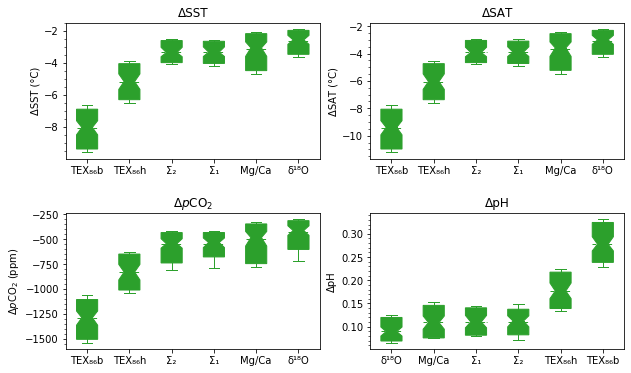

In [13]:
# cooling plot and data saving

#whiteblack = 'black'  # using black list
whiteblack = 'white'   # using white list
priorset = 17    # prior using PETM017 or PETM018

if priorset == 17:
    whitelist = whitelist17
    warmfig = xlsxdir+whiteblack+'.17.sum.cooling.pdf'
    fullname = xlsxdir+'sum.17.cooling.xlsx'
    fullused = xlsxdir+'sum.17.cooling.used.xlsx'
else:
    whitelist = whitelist18
    warmfig = xlsxdir+whiteblack+'.18.sum.cooling.pdf'
    fullname = xlsxdir+'sum.18.cooling.xlsx'
    fullused = xlsxdir+'sum.18.cooling.used.xlsx'

dfused = pandas.DataFrame()  # save used data

if plotdata == 1:
    
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,6))
    
    for loci in range(7):
        if loci in [3,5,6]:
            continue
        result = dfcool.loc[loci]
        a_list = []
        result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
            
            df4 = result.iloc[ki]
            df4['proxy'] = dict0[filei]
            if loci == 0:
                df4['field'] = 'dSST'                
            elif loci == 1:
                df4['field'] = 'dSAT'
            elif loci == 2:
                df4['field'] = 'dCO2'
            elif loci == 4:
                df4['field'] = 'dpH'
            dfused = pandas.concat([dfused,df4],sort=False,axis=1)
            #dfused = pandas.concat([dfused,result],sort=False,axis=1)
        #print(a_list)
        
        if loci == 0:
            axes[0,0].set_title('\u0394SST')
            axes[0,0].set_ylabel('\u0394SST (\u00B0C)')
            bp = axes[0,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        elif loci == 1:
            axes[0,1].set_title('\u0394SAT')
            axes[0,1].set_ylabel('\u0394SAT (\u00B0C)')
            bp = axes[0,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        elif loci == 2:
            axes[1,0].set_title('\u0394$\it{p}$CO$_2$')
            axes[1,0].set_ylabel('\u0394$\it{p}$CO$_2$ (ppm)')
            bp = axes[1,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        elif loci == 4:
            axes[1,1].set_title('\u0394pH')
            axes[1,1].set_ylabel('\u0394pH')
            bp = axes[1,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C2')
        fig.subplots_adjust(hspace=0.4)
        
    fig.savefig(warmfig)
    
if exportxlsx == 1:
    dfused=dfused.transpose()
    #dfused = dfused.sort_index()
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)
    dfused.to_excel(fullused)

In [ ]:
# warming plot and data saving

#whiteblack = 'black'  # using black list
whiteblack = 'white'   # using white list
priorset = 17    # prior using PETM017 or PETM018

if priorset == 17:
    whitelist = whitelist17
    warmfig = xlsxdir+whiteblack+'.17.ca.sum.warming.pdf'
    fullname = xlsxdir+'sum.17.ca.warming.xlsx'
else:
    whitelist = whitelist18
    warmfig = xlsxdir+whiteblack+'.18.ca.sum.warming.pdf'
    fullname = xlsxdir+'sum.18.ca.warming.xlsx'

if plotdata == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,6))
    
    for loci in range(7):
        if loci in [3,5,6]:
            continue
        result = df.loc[loci]
        a_list = []
        result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
        #print(a_list)
    
        if loci == 0:
            axes[0,0].set_title('\u0394SST')
            axes[0,0].set_ylabel('\u0394SST (\u00B0C)')
            bp = axes[0,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        elif loci == 1:
            axes[0,1].set_title('\u0394SAT')
            axes[0,1].set_ylabel('\u0394SAT (\u00B0C)')
            bp = axes[0,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[0,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        elif loci == 2:
            axes[1,0].set_title('\u0394$\it{p}$CO$_2$')
            axes[1,0].set_ylabel('\u0394$\it{p}$CO$_2$ (ppm)')
            bp = axes[1,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,0].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        elif loci == 4:
            axes[1,1].set_title('\u0394pH')
            axes[1,1].set_ylabel('\u0394pH')
            bp = axes[1,1].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
            axes[1,1].yaxis.set_minor_locator(AutoMinorLocator())
            for element in bp.keys():
                plt.setp(bp[element], color='C1')
        fig.subplots_adjust(hspace=0.4)
        
    fig.savefig(warmfig)
        
if exportxlsx == 1:
    print('saved @')    
    print(fullname)
    df.to_excel(fullname)

In [ ]:

    

        if loci == 0:
            ax.set_title('\u0394SST (\u00B0C)')
        elif loci == 1:
            ax.set_title('\u0394SAT (\u00B0C)')
        elif loci == 2:
            ax.set_title('\u0394$\it{p}$CO$_2$ (ppm)')
        elif loci == 4:
            ax.set_title('\u0394pH')      

if exportxlsx == 1:
    print('saved @')
    fullname = xlsxdir+'sum.cooling.xlsx'
    print(fullname)
    dfcool.to_excel(fullname)

In [ ]:
## Old version of previous block

whiteblack = 'white'
whitelist = whitelist17
#whitelist = whitelist18
#whiteblack = 'black'

if plotdata == 1:
    for loci in range(7):
        if loci in [3,5,6]:
            continue
        result = df.loc[loci]
        a_list = []
        result = result.sort_values(by=['median'])
        result.index = np.arange(0,len(result)).tolist()
        #print(result)
        
        for ki in range(len(result)):
            
            filei = result['file'][ki]
            if whiteblack == 'black':
                if filei in blacklist:
                    #print('Skip {}'.format(filei))
                    continue
            elif whiteblack == 'white':
                if filei not in whitelist:
                    continue
            
            rowi = {'label': dict0[filei],
                    'mean': result['mean'][ki], 
                    'q1': result['5%'][ki], 
                    'q3': result['95%'][ki], 
                    'cilo': result['25%'][ki], 
                    'med': result['median'][ki], 
                    'cihi': result['75%'][ki],
                    'iqr': result['75%'][ki] - result['25%'][ki], 
                    'whislo': result['2.5%'][ki], 
                    'whishi': result['97.5%'][ki], 
                    'fliers': [np.nan]}

            rowi_copy = rowi.copy()
            a_list.append(rowi_copy)
        #print(a_list)
        
        fig, ax = plt.subplots(figsize=(8,4))
        bp = ax.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
        #bp = ax.bxp(a_list, showmeans=True,meanline=True, positions=range(len(a_list)))
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # Colour the lines in the boxplot blue
        for element in bp.keys():
            plt.setp(bp[element], color='C1')
        

        if loci == 0:
            ax.set_title('\u0394SST (\u00B0C)')
        elif loci == 1:
            ax.set_title('\u0394SAT (\u00B0C)')
        elif loci == 2:
            ax.set_title('\u0394$\it{p}$CO$_2$ (ppm)')
        elif loci == 4:
            ax.set_title('\u0394pH')

Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e400_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e100_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_all_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_all_e400_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_TOM_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_TOM_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18hiatus2.csv_petm17_v18h2_2020918_all_100mc-petmproxy3slices_v0.0.18hiatus2.csv_petm18_v18h2_2020918_all_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18.csv_petm17_v18_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18.csv_petm18_v18_2021011_ca_e100_100mc.summary.xlsx
Skip petmproxy3slices_v0.0.18hiatus.csv_petm17_v18h_2021011_ca_e100_100mc-petmproxy3slices_v0.0.18hiatus.csv_petm18_v18h_202

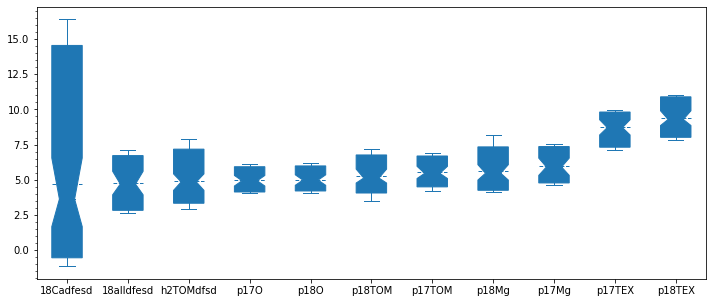

In [4]:
if plotdata == 1:    
    result = df.loc[0] 
    
    a_list = []
    result = result.sort_values(by=['median'])
    result.index = np.arange(0,len(result)).tolist()
    #print(result)
    
    for ki in range(len(result)):
        
        filei = result['file'][ki]
        if filei in blacklist:
            print('Skip {}'.format(filei))
            continue
        rowi = {'label': dict0[filei],
                'mean': result['mean'][ki], 
                'q1': result['5%'][ki], 
                'q3': result['95%'][ki], 
                'cilo': result['25%'][ki], 
                'med': result['median'][ki], 
                'cihi': result['75%'][ki],
                'iqr': result['75%'][ki] - result['25%'][ki], 
                'whislo': result['2.5%'][ki], 
                'whishi': result['97.5%'][ki], 
                'fliers': [np.nan]}
        
        rowi_copy = rowi.copy()
        a_list.append(rowi_copy)
    #print(a_list)


    fig, ax = plt.subplots(figsize=(12,5))

    bp = ax.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
    #bp = ax.bxp(a_list, showmeans=True,meanline=True, positions=range(len(a_list)))

    # Colour the lines in the boxplot blue
    for element in bp.keys():
        plt.setp(bp[element], color='C0')
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    #print(result['file'])

In [ ]:
rowi = {#'label': str(ki),
                'label': dict0[filei],
                'mean': result['mean'][ki], 
                'q1': result['25%'][ki], 
                'med': result['median'][ki], 
                'q3': result['75%'][ki],
                'iqr': result['75%'][ki] - result['25%'][ki], 
                'cilo': result['2.5%'][ki], 
                'cihi': result['97.5%'][ki], 
                'whislo': result['5%'][ki], 
                'whishi': result['95%'][ki], 
                'fliers': [np.nan]}

In [ ]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
    bp = ax.bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))
    #bp = ax.bxp(a_list, showmeans=True,meanline=True, positions=range(len(a_list)))
    # Colour the lines in the boxplot blue
    for element in bp.keys():
        plt.setp(bp[element], color='C0')
    axes[0,0].yaxis.set_minor_locator(AutoMinorLocator())
    
    if loci == 0:
        ax.set_title('\u0394SST (\u00B0C)')
    elif loci == 1:
        ax.set_title('\u0394SAT (\u00B0C)')
    elif loci == 2:
        ax.set_title('\u0394$\it{p}$CO$_2$ (ppm)')
    elif loci == 4:
        ax.set_title('\u0394pH')
    #bp = axes[0,0].bxp(a_list, shownotches = True, patch_artist=True,showmeans=True,meanline=True, positions=range(len(a_list)))

       2.5%        5%       25%     median        75%        95%      97.5%
0  2.317950  2.613131  3.571773   4.325117   5.132103   6.504773   7.459739
0  3.509363  4.055639  4.765696   5.122781   5.754438   6.761597   7.188854
0  7.820478  8.016628  8.855636   9.289579   9.902816  10.895213  11.015216
0  3.694171  4.392601  6.517522   8.600277  11.612267  19.533465  21.490248
0  4.078326  4.201553  4.604086   4.973091   5.350308   5.981518   6.188651
0  5.645052  6.226501  8.450278  10.265462  13.370102  21.224034  23.090290
0 -1.587343 -0.599164  1.464223   3.573122   6.644906  14.429245  16.437015
0  2.054631  2.379213  3.847334   4.841913   5.839884   7.912980   8.350005
0  3.491069  3.958159  4.983769   5.818744   6.936614   8.662124  10.333409
0 -3.030437 -1.877576  3.092854   7.059956  11.182971  20.735957  23.447071
0  4.201211  4.492010  5.086149   5.453106   5.953813   6.688246   6.865991
0  4.631879  4.771879  5.311154   5.907766   6.536100   7.358716   7.576161
0  4.025190 

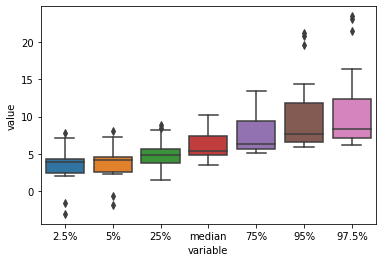

In [ ]:

print(pwd)

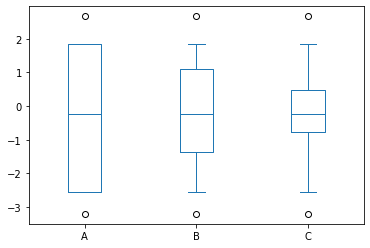

In [55]:
stats['A']

{'label': 'A',
 'mean': -0.1466251162276963,
 'iqr': 1.2563858621511241,
 'cilo': -0.4227522899438978,
 'cihi': -0.028247129228444773,
 'whishi': 1.8389970992813731,
 'whislo': -2.5593845214816455,
 'fliers': array([-3.20504023,  2.67217242]),
 'q1': -2.5658410785952266,
 'med': -0.22549970958617127,
 'q3': 1.8473288524666114}

In [56]:
stats['B']

{'label': 'B',
 'mean': -0.1466251162276963,
 'iqr': 1.2563858621511241,
 'cilo': -0.4227522899438978,
 'cihi': -0.028247129228444773,
 'whishi': 1.8389970992813731,
 'whislo': -2.5593845214816455,
 'fliers': array([-3.20504023,  2.67217242]),
 'q1': -1.3613807991203901,
 'med': -0.22549970958617127,
 'q3': 1.0902518848872687}